# Pymaceuticals Inc.
---

### Analysis

Ramicane and Capomulin are clearly the more effective drugs based on the box plots.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# Checking the number of mice.
total_mice_count = mouse_metadata['Mouse ID'].nunique()
total_mice_count

249

In [58]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_timepoints = merged_df[duplicates]

duplicate_mouse_ids = duplicate_timepoints['Mouse ID'].unique()


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pd.DataFrame(merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)])
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df['Mouse ID'].nunique()
print(f"Total number of mice in the clean DataFrame: {clean_mice_count}")

Total number of mice in the clean DataFrame: 249


## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import statistics
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
means = [grouped.mean()]
medians = [grouped.median()]
variance = grouped.var()
std = grouped.std()
sem = grouped.sem()
grouped_df = pd.DataFrame(grouped)
statistics_df = pd.DataFrame({"Mean": means, "Median": medians})
# grouped_df.rename(columns={0:'first', 1:'second'}, inplace=True)
# grouped_df['second'] = grouped_df['second'].astype(float)
statistics_df# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean,Median
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...


In [63]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = grouped.agg(['mean', 'median', 'var', 'std', "sem"])

# Using the aggregation method, produce the same summary statistics in a single line
pd.DataFrame(summary_stats)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

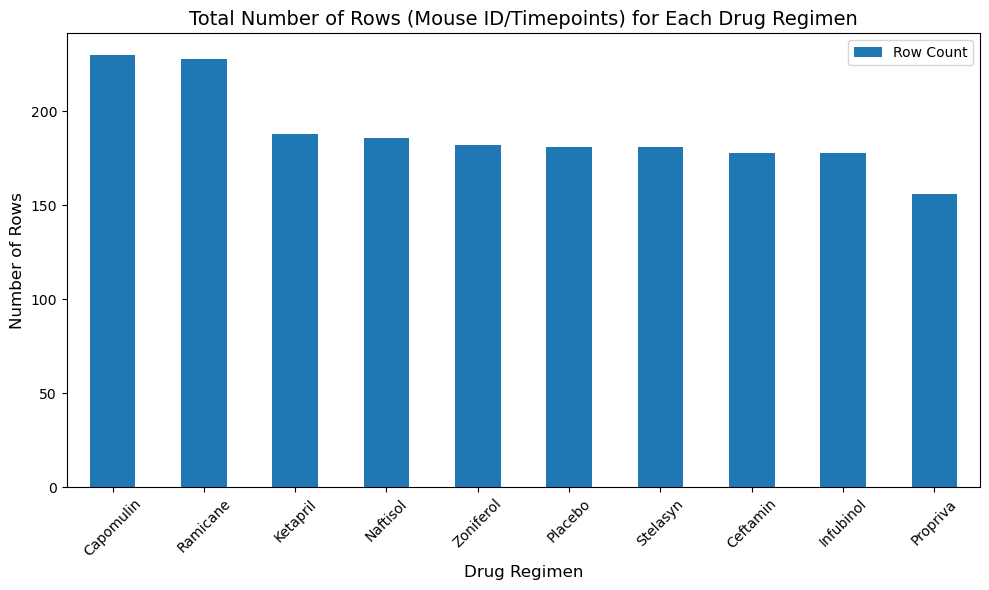

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts = clean_df.groupby('Drug Regimen').size().reset_index(name='Row Count')
row_counts = row_counts.sort_values(by='Row Count', ascending=False)

ax = row_counts.plot.bar(x='Drug Regimen', y='Row Count', rot=45, figsize=(10, 6))

ax.set_xlabel('Drug Regimen', fontsize=12)
ax.set_ylabel('Number of Rows', fontsize=12)
ax.set_title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen', fontsize=14)

plt.tight_layout()

plt.show()

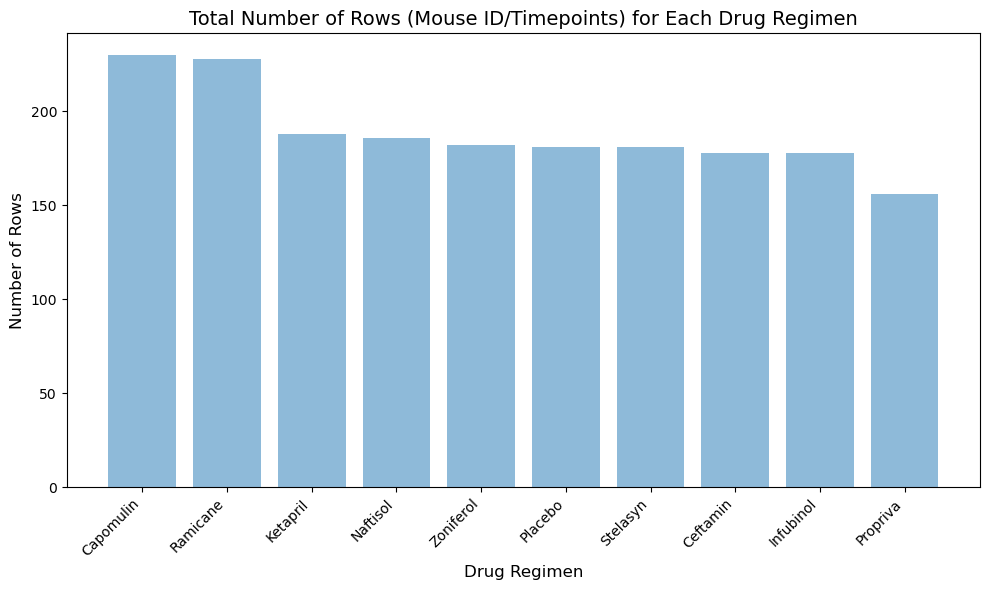

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = np.arange(len(row_counts['Drug Regimen']))
bar_heights = row_counts['Row Count']
bars = ax.bar(bar_positions, bar_heights, align='center', alpha=0.5)

ax.set_xticks(bar_positions)
ax.set_xticklabels(row_counts['Drug Regimen'], rotation=45, ha='right')
ax.set_xlabel('Drug Regimen', fontsize=12)
ax.set_ylabel('Number of Rows', fontsize=12)
ax.set_title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen', fontsize=14)
plt.tight_layout()
plt.show()

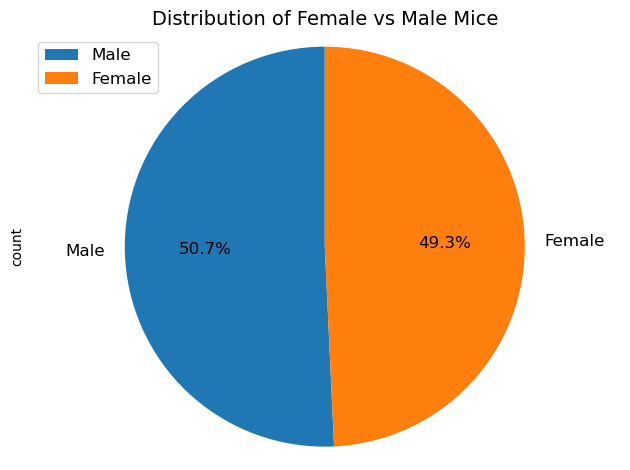

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()

ax = sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, fontsize=12)
ax.set_title('Distribution of Female vs Male Mice', fontsize=14)
ax.legend(labels=sex_counts.index, loc='upper left', fontsize=12)

plt.axis('equal')
plt.tight_layout()
plt.show()

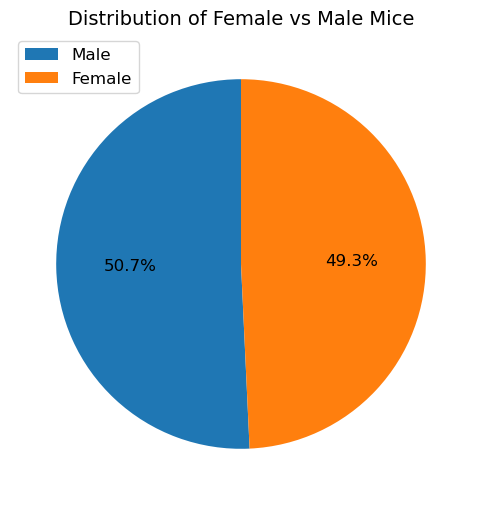

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize=(6, 6))

values = sex_counts.values
percentages = 100 * values / values.sum()

wedges, texts, autotexts = ax.pie(values, autopct='%1.1f%%', startangle=90, textprops=dict(fontsize=12))
ax.set_title('Distribution of Female vs Male Mice', fontsize=14)
ax.legend(wedges, sex_counts.index, loc='upper left', fontsize=12)

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

sorted_df = clean_df.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, False])

last_timepoints = sorted_df.drop_duplicates('Mouse ID', keep='last')[['Mouse ID', 'Timepoint']]

# Merge the last_timepoints DataFrame with the original DataFrame
last_timepoint_data = clean_df.merge(last_timepoints, how='inner', on=['Mouse ID', 'Timepoint'])

# Print the last timepoint data for each mouse
last_timepoint_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0
245,z435,Propriva,Female,12,26,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = clean_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_subset = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_data.append(treatment_subset)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_subset.quantile([0.25, 0.5, 0.75])
    q1, q3 = quartiles[0.25], quartiles[0.75]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    potential_outliers = treatment_subset[(treatment_subset < lower_bound) | (treatment_subset > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers.to_string(index=False)}")
    


Ramicane's potential outliers: 22.050126
Capomulin's potential outliers: 25.472143
23.343598
Infubinol's potential outliers: Series([], )
Placebo's potential outliers: Series([], )
Ceftamin's potential outliers: Series([], )
Stelasyn's potential outliers: 75.12369
Zoniferol's potential outliers: Series([], )
Ketapril's potential outliers: Series([], )
Propriva's potential outliers: 71.172463
72.455421
Naftisol's potential outliers: Series([], )


Text(0.5, 1.0, 'Tumor Volume by Drug Regimen')

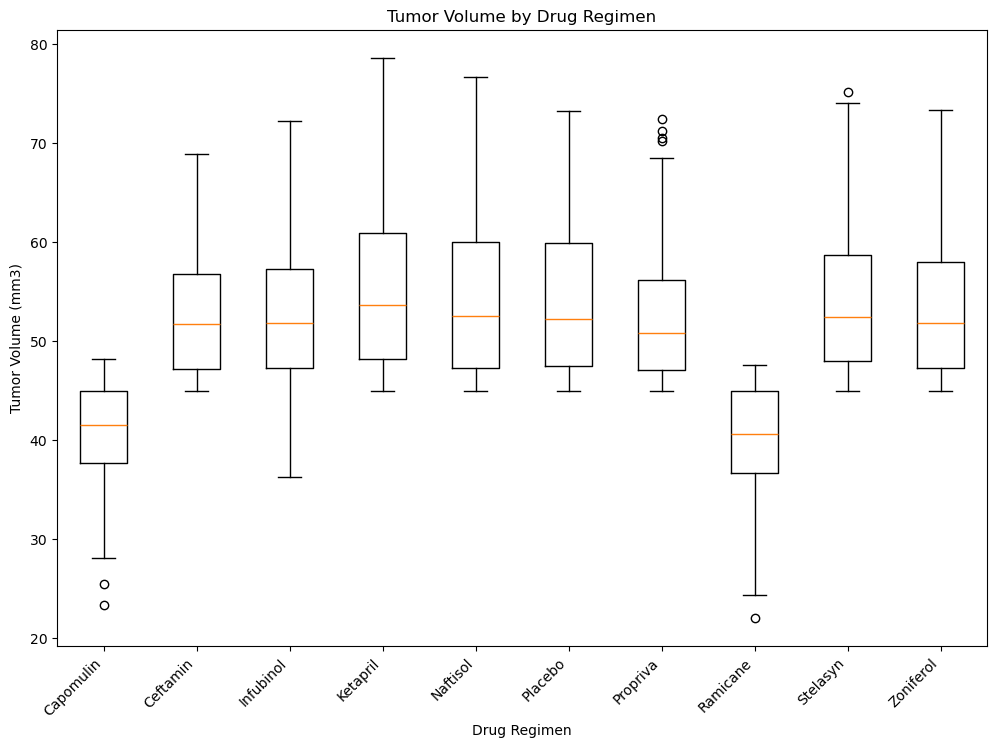

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
grouped_data = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
treatment_list = grouped_data.groups.keys()
tumor_vol_data = [grouped_data.get_group(treatment) for treatment in treatment_list]

plt.figure(figsize=(12, 8)) 
plt.boxplot(tumor_vol_data, labels=treatment_list)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Drug Regimen')

## Line and Scatter Plots

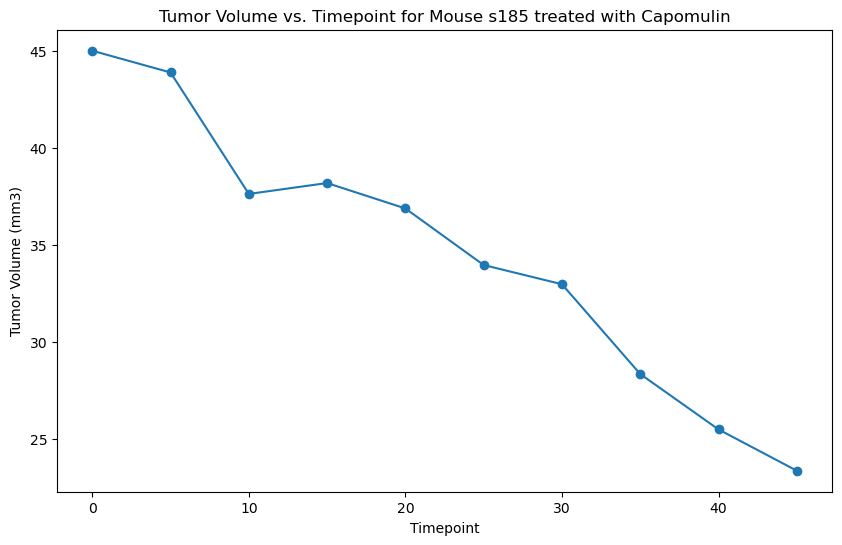

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse s185 treated with Capomulin')

plt.show()

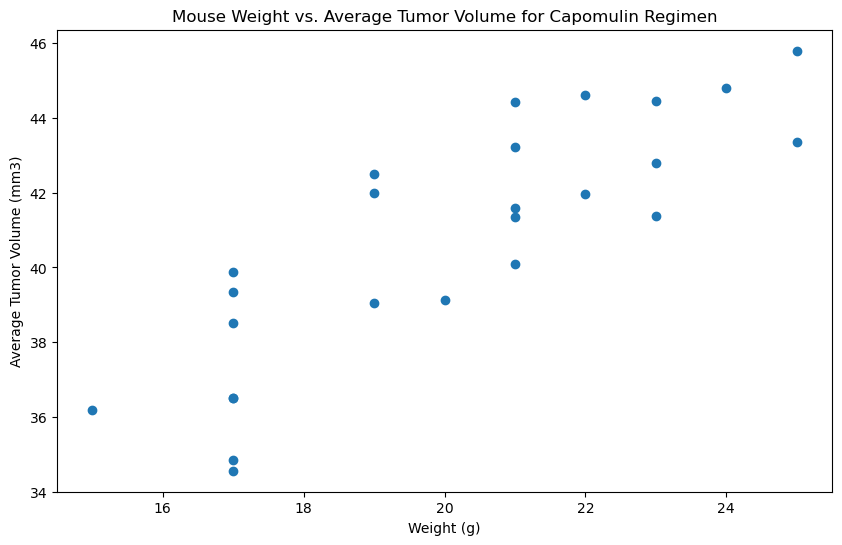

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_tumor_vol_weight = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol_weight['Weight (g)'], avg_tumor_vol_weight['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722


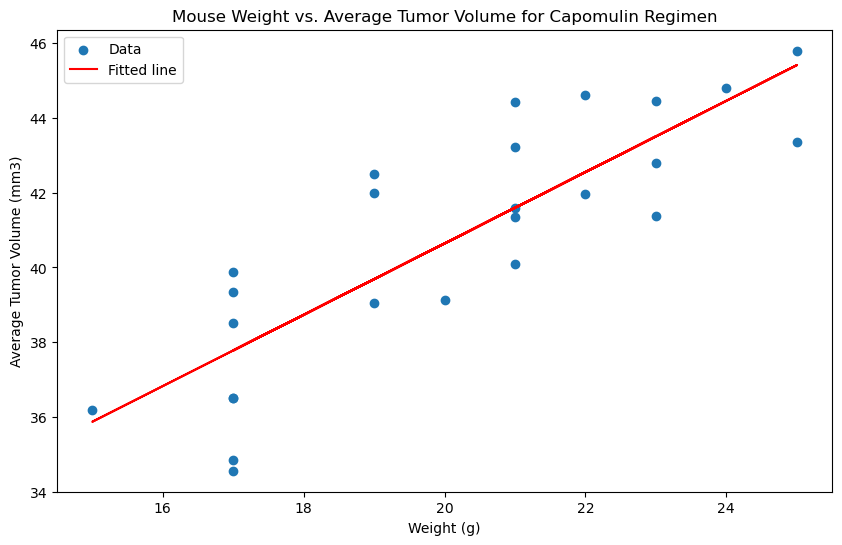

In [74]:
# Calculate the correlation coefficient and a linear regression model 

correlation = avg_tumor_vol_weight['Weight (g)'].corr(avg_tumor_vol_weight['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_vol_weight['Weight (g)'], avg_tumor_vol_weight['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_vol_weight['Weight (g)'], avg_tumor_vol_weight['Tumor Volume (mm3)'], label='Data')
plt.plot(avg_tumor_vol_weight['Weight (g)'], intercept + slope * avg_tumor_vol_weight['Weight (g)'], 'r', label='Fitted line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()

plt.show()